# Analyse des  Cryptocurrency 

Il existe plusieurs voies que l'on peut emprunter pour décider dans quelles cryptocurrences investir, mais une poignée d'entre elles se sont hissées au sommet comme les options d'investissement les plus populaires, ce sont :
1. Bitcoin (BTC)
2. Ethereum (ETH)
3. Litecoin (LTC)
4. Bitcoin Cash (BCH)
5. Ripple (XRP)
6. Monero (XMR)
7. Zcash (ZEC)

Dans ce rapport d'analyse, on va effectuer une analyse exploratoire des données et construire des modèles d'apprentissage automatique pour prédire les prix du marché dans l'année prochaine pour les 7 cryptocurrences ci-dessus.

***

## 1. Prepare Data Set<a id="1"></a>



### Charger les paquets Python<a id="1-1"></a>

In [58]:
import numpy as np
import pandas as pd
import datetime as dt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Load and Prepare Data Set<a id="1-2"></a>

In [59]:
# load data set
data = pd.read_csv('crypto-markets.csv', parse_dates=['date'],index_col='date')

In [60]:
# afficher l'ensemble des données
data.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


Selon Business Insider, les meilleures cryptocurrencies dans lesquelles investir sont les suivantes :
1. Bitcoin (BTC)
2. Ethereum (ETH)
3. Litecoin (LTC)
4. Bitcoin Cash (BCH)
5. Ripple (XRP)
6. Monero (XMR)
7. Zcash (ZEC)
1. Open: price of the coin at the start of the trading day
2. Close: price of the coin at the end of the trading day
3. High: highest price in the trading day
4. Low: lowest price in the trading day

Nous allons donc faire quelques analyses et prédictions pour ces 7 cryptocurrencies


In [61]:
# select Bitcoin (BTC), Litecoin (LTC), Ethereum (ETH), Zcash (ZEC), Ripple (XRP), Monero (XMR) and Bitcoin Cash (BCH)
data = data[data.symbol.isin(['BTC', 'LTC', 'ETH', 'ZEC', 'XRP', 'XMR', 'BCH'])]

In [62]:
# afficher le nombre total d'enregistrements pour les 7  cryptocurrencies
data.name.value_counts()

Bitcoin         1761
Litecoin        1761
Ripple          1663
Monero          1372
Ethereum         930
Zcash            481
Bitcoin Cash     214
Name: name, dtype: int64

In [63]:
# afficher le volume et les types de données 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8182 entries, 2013-04-28 to 2018-02-21
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   slug         8182 non-null   object 
 1   symbol       8182 non-null   object 
 2   name         8182 non-null   object 
 3   ranknow      8182 non-null   int64  
 4   open         8182 non-null   float64
 5   high         8182 non-null   float64
 6   low          8182 non-null   float64
 7   close        8182 non-null   float64
 8   volume       8182 non-null   int64  
 9   market       8182 non-null   int64  
 10  close_ratio  8182 non-null   float64
 11  spread       8182 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 831.0+ KB


## 2.  Évaluation de la qualité des données<a id="2"></a>

### Vérifier les valeurs manquantes<a id="2-1"></a>

In [64]:
# vérifier si l'ensemble de données contient des valeurs manquantes
print(data.isnull().sum())

# affirmer qu'il n'y a pas de valeurs manquantes
assert data.notnull().all().all()

slug           0
symbol         0
name           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


Aucune valeur manquante n'existe dans cet ensemble de données.

### Vérifier les valeurs dupliquées<a id="2-2"></a>

In [65]:
# vérifier si l'ensemble de données contient des enregistrements dupliqués
print(data.duplicated().sum())

0


Il n'y a pas d'enregistrement de nomination en double dans cet ensemble de données. The data is clean.

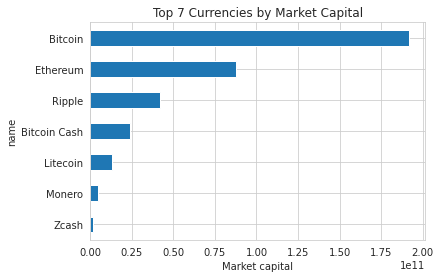

In [66]:
ax = data.groupby(['name'])['market'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market capital");
plt.title("Top 7 Currencies by Market Capital");

Comme nous pouvons le constater, le Bitcoin a un capital de marché très important par rapport aux autres.



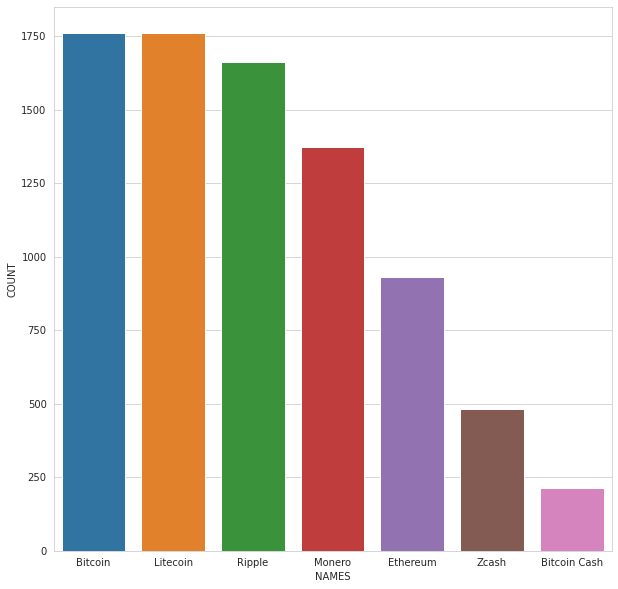

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['name'],order=data['name'].value_counts().index);
plt.xlabel("NAMES");
plt.ylabel("COUNT");

Le countplot montre le compte ou le nombre total de lignes d'une monnaie particulière dans l'ensemble de données. Comme nous pouvons le voir, Litecoin, Bitcoin ont environ 2000 lignes, XRP a environ 1800 lignes et stellar a 1600 lignes. Nous pouvons également voir que Bitcoin SV, Cardano, Bitcoin Cash ont très peu de lignes par rapport à Litecoin et Bitcoin.

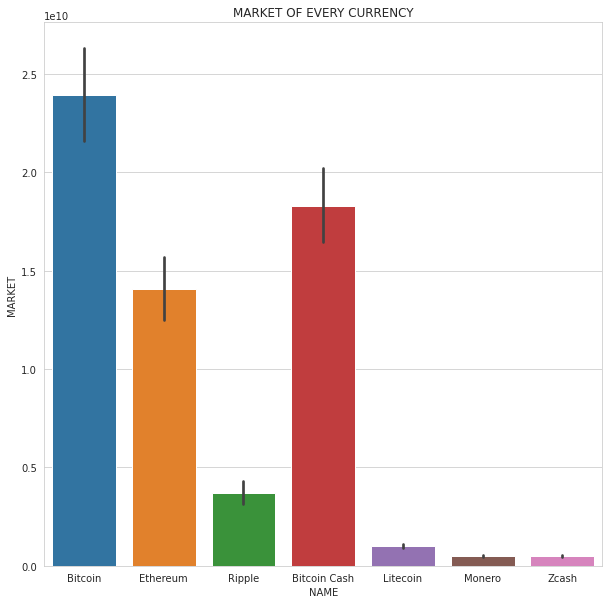

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['name'],y=data['market']);
plt.xlabel("NAME");
plt.ylabel("MARKET");
plt.title("MARKET OF EVERY CURRENCY");

Le graphique à barres montre la valeur du marché pour chacune des devises. D'après le graphique, nous pouvons voir que le Bitcoin a un capital énorme par rapport aux autres. La deuxième crypto-monnaie avec un bon capital de marché est Ethereum. Le Bitcoin Cash et le XRP sont d'autres crypto-monnaies avec un petit capital de marché. Stellar, Tether, Bitcoin SV et EOS ont un marché très faible par rapport à toutes les autres monnaies présentes dans les données.

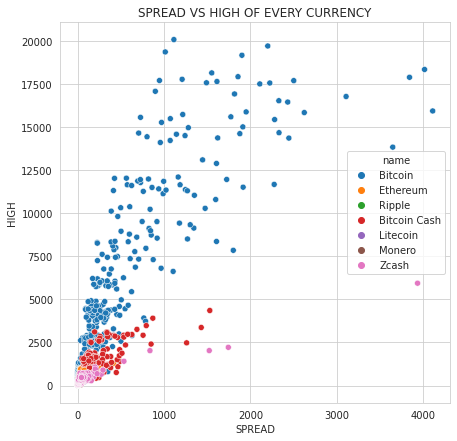

In [69]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=data['spread'],y=data['high'],hue=data['name']);
plt.title('SPREAD VS HIGH OF EVERY CURRENCY');
plt.xlabel('SPREAD');
plt.ylabel('HIGH');

Le nuage de points montre le haut par rapport au spread de chaque monnaie. Le graphique montre que toutes les monnaies, à l'exception du bitcoin, ont un spread et un high très faibles, tandis que le bitcoin atteint la barre des 20000 en high et presque 4000 en spread. Nous pouvons conclure que le Bitcoin est la monnaie la plus étalée avec le plus grand capital de marché et la plus grande valeur élevée.

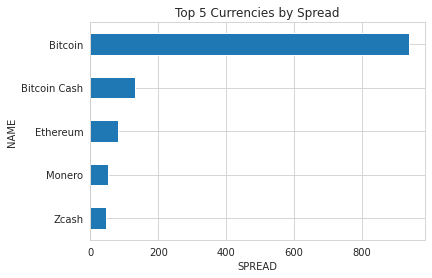

In [70]:
ax = data.groupby(['name'])['spread'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh');
ax.set_xlabel("SPREAD");
ax.set_ylabel("NAME")
plt.title("Top 5 Currencies by Spread");

Ce graphique à barres montre les 5 premières devises par spread. A part le bitcoin, toutes les autres monnaies ont un spread inférieur à 200 alors que le bitcoin a un spread supérieur à 800.

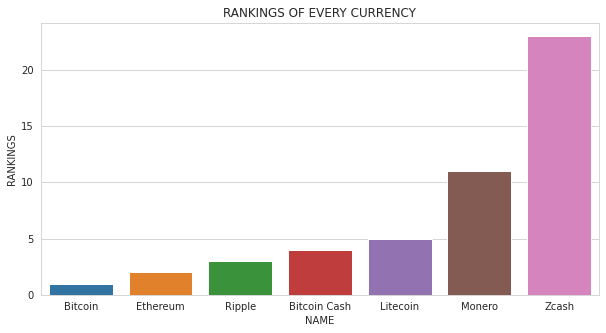

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['name'],y=data['ranknow']);
plt.xlabel("NAME");
plt.ylabel("RANKINGS");
plt.title("RANKINGS OF EVERY CURRENCY");

Ce graphique montre le classement de chaque monnaie. Nous pouvons clairement voir que le Bitcoin est en première position et le XRP en deuxième position.Cardano est en dernière position, c'est-à-dire en dixième position dans la liste des dix premières devises.

## 3. Analyse exploratoire des données et Feature Engineering<a id="3"></a>

### Capitalisation du marché et volume des transactions<a id="3-1"></a>

Check market capitalization and transaction volume for each cryptocurrency we choose.

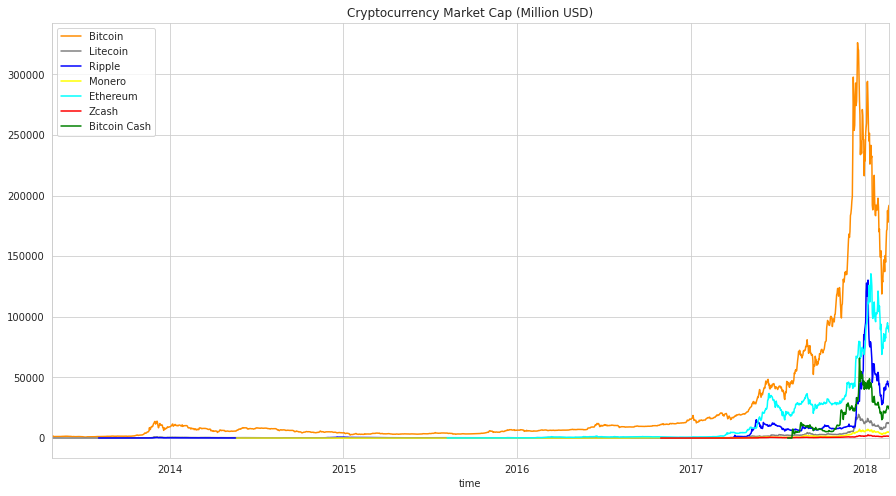

In [72]:
# plot market capitalization
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['market']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['market']/1000000).plot(color='grey', label='Litecoin')
(ripple['market']/1000000).plot(color='blue', label='Ripple')
(monero['market']/1000000).plot(color='yellow', label='Monero')
(ethereum['market']/1000000).plot(color='cyan', label='Ethereum')
(zcash['market']/1000000).plot(color='red', label='Zcash')
(bitcoin_cash['market']/1000000).plot(color='green', label='Bitcoin Cash')

plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Market Cap (Million USD)')
plt.show()

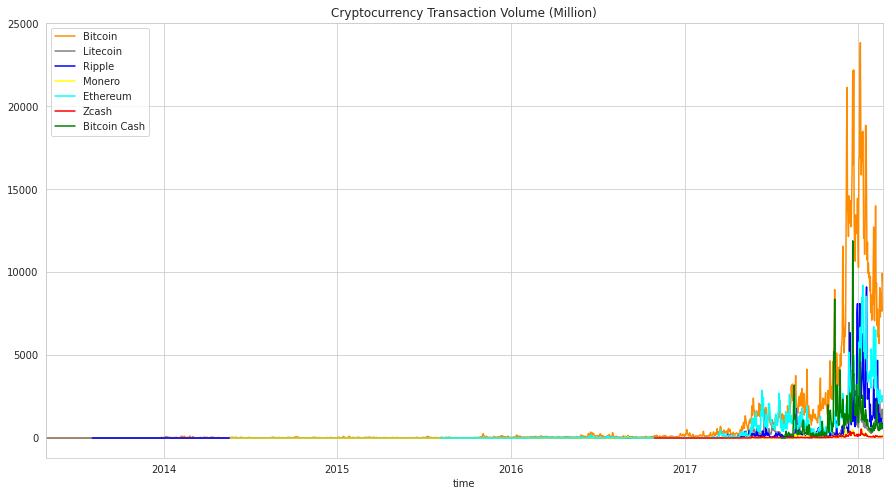

In [73]:
# plot transaction volume
plt.figure(figsize=(15,8))
(bitcoin['volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['volume']/1000000).plot(color='grey', label='Litecoin')
(ripple['volume']/1000000).plot(color='blue', label='Ripple')
(monero['volume']/1000000).plot(color='yellow', label='Monero')
(ethereum['volume']/1000000).plot(color='cyan', label='Ethereum')
(zcash['volume']/1000000).plot(color='red', label='Zcash')
(bitcoin_cash['volume']/1000000).plot(color='green', label='Bitcoin Cash')

plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Transaction Volume (Million)')
plt.show()

Comme nous pouvons le voir sur les graphiques de la capitalisation boursière et du volume de transactions, rien ne s'est vraiment passé avant 2017 (Seul le Bitcoin a eu quelques transactions), 2017 a apparemment été une année de rupture pour cryptocurrency ecosystem. <br>On trouve aussi :

1. A mesure que le volume de transactions de BitCoin a augmenté, le volume des autres cryptocurrency a également augmenté.
2. Le prix du BitCoin a augmenté, tout comme le prix des autres cryptocurrency.
3. Il semble que le BitCoin soit à la tête des changements du marché<br>

In [74]:
data_m = data['2017-12-01':'2017-12-31']

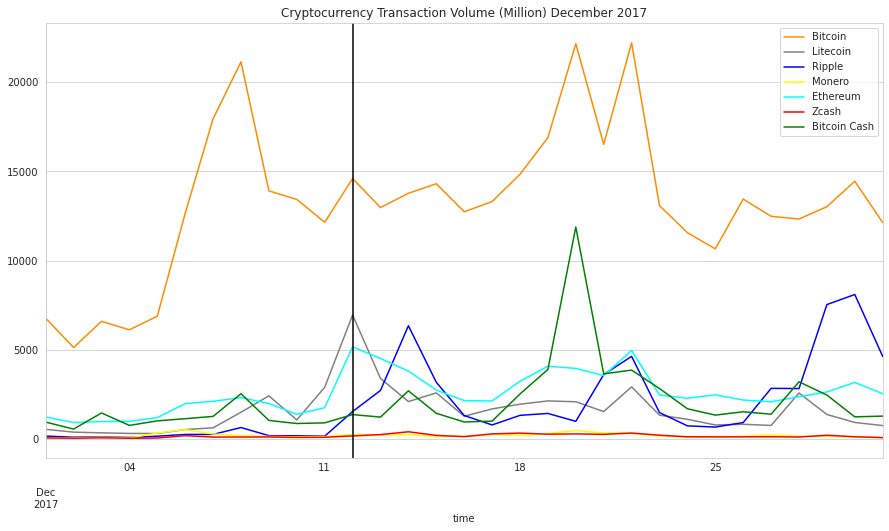

In [75]:
bitcoin = data_m[data_m['symbol']=='BTC']
litecoin = data_m[data_m['symbol']=='LTC']
ripple = data_m[data_m['symbol']=='XRP']
monero = data_m[data_m['symbol']=='XMR']
ethereum = data_m[data_m['symbol']=='ETH']
zcash = data_m[data_m['symbol']=='ZEC']
bitcoin_cash = data_m[data_m['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['volume']/1000000).plot(color='grey', label='Litecoin')
(ripple['volume']/1000000).plot(color='blue', label='Ripple')
(monero['volume']/1000000).plot(color='yellow', label='Monero')
(ethereum['volume']/1000000).plot(color='cyan', label='Ethereum')
(zcash['volume']/1000000).plot(color='red', label='Zcash')
(bitcoin_cash['volume']/1000000).plot(color='green', label='Bitcoin Cash')
plt.axvline(dt.datetime(2017, 12, 12),color='black')
plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Transaction Volume (Million) December 2017')
plt.show()

En regardant de plus près les données d'un mois pour le volume de trasaction en décembre 2017 , nous pouvons clairement voir que lorsque le volume de BitCoin a augmenté et atteint un pic vers le 12/7, d'autres crypto-monnaies ont commencé à augmenter et à atteindre un pic quelques jours plus tard.

#### Afin que notre analyse soit plus précise par rapport à la tendance actuelle, nous nous concentrerons sur les années 2017 et 2018.

In [76]:
data = data['2017-01-01':]
data.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38
2017-01-02,bitcoin,BTC,Bitcoin,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69
2017-01-03,bitcoin,BTC,Bitcoin,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48
2017-01-04,bitcoin,BTC,Bitcoin,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02
2017-01-05,bitcoin,BTC,Bitcoin,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68


### Fluctuation(changement) du prix des Cryptocurrencies<a id="3-2"></a>

Vérifiez le prix d'ouverture, de fermeture, le plus haut et le plus bas pour chacune des cryptocurrency.

In [77]:
data['oc_diff']=data['close']-data['open']
data.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread,oc_diff
date,,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38,34.67
2017-01-02,bitcoin,BTC,Bitcoin,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69,23.13
2017-01-03,bitcoin,BTC,Bitcoin,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48,22.24
2017-01-04,bitcoin,BTC,Bitcoin,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02,110.33
2017-01-05,bitcoin,BTC,Bitcoin,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68,-143.35


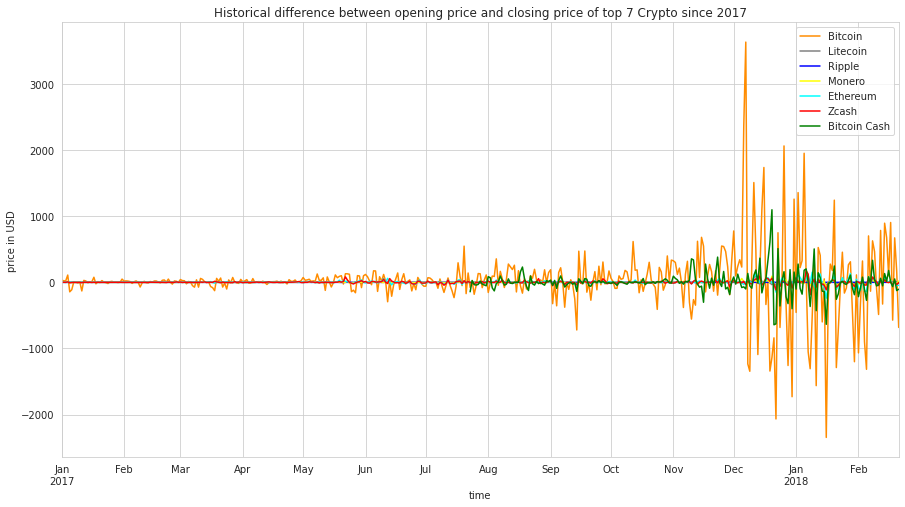

In [78]:
# Difference between opening and closing price
data['oc_diff']=data['close']-data['open']
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['oc_diff']).plot(color='darkorange', label='Bitcoin')
(litecoin['oc_diff']).plot(color='grey', label='Litecoin')
(ripple['oc_diff']).plot(color='blue', label='Ripple')
(monero['oc_diff']).plot(color='yellow', label='Monero')
(ethereum['oc_diff']).plot(color='cyan', label='Ethereum')
(zcash['oc_diff']).plot(color='red', label='Zcash')
(bitcoin_cash['oc_diff']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical difference between opening price and closing price of top 7 Crypto since 2017')
plt.legend()
plt.show()

En traçant la différence entre le prix d'ouverture et de fermeture quotidien, nous avons constaté que :

1. Le prix d'ouverture et de clôture quotidien de BitCoin et BitCoin Cash varie le plus, les différences peuvent aller de 1000 à plus de 3000 dollars.
2. Le reste des crypto-monnaies que nous avons sélectionnées a tendance à être assez stable.

In [79]:
# Différence moyenne pour chaque cryptocurrency
ave_diff={'bitcoin':[(bitcoin['oc_diff']).mean()],
          'litecoin':[(litecoin['oc_diff']).mean()],
          'ripple':[(ripple['oc_diff']).mean()],
          'monero':[(monero['oc_diff']).mean()],
          'ethereum':[(ethereum['oc_diff']).mean()],
          'zcash':[(zcash['oc_diff']).mean()],
          'bitcoin_cash':[(bitcoin_cash['oc_diff']).mean()]}
pd.DataFrame(ave_diff, index=['avg.diff'])

,bitcoin,litecoin,ripple,monero,ethereum,zcash,bitcoin_cash
avg.diff,22.604724,0.450552,0.002482,0.638345,1.86199,0.997602,2.66972


Pour mieux comprendre la différence entre le prix d'ouverture et de clôture quotidien, nous avons calculé la différence moyenne ainsi que l'écart de prix quotidien pour chaque cryptocurrency. Il apparaît clairement que BitCoin et BitCoin Cash varient le plus.

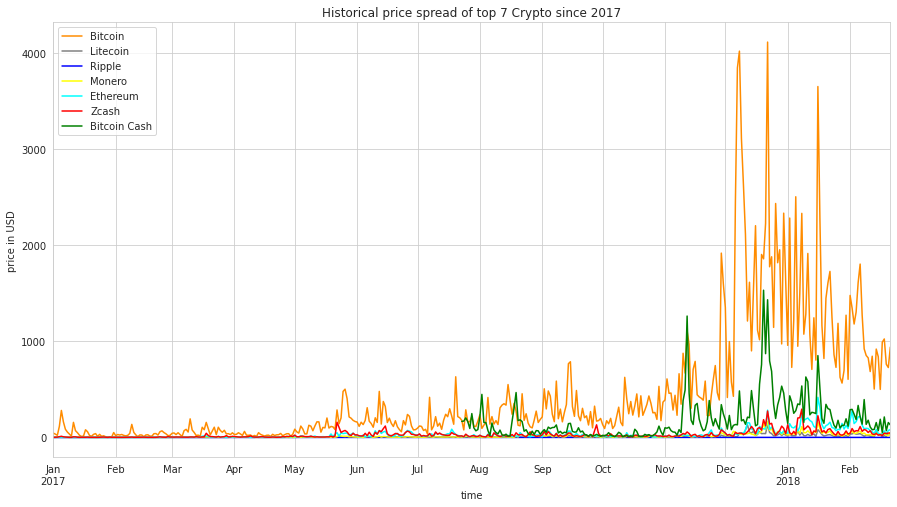

In [80]:
# Différences entre les prix les plus élevés et les plus bas
plt.figure(figsize=(15,8))
(bitcoin['spread']).plot(color='darkorange', label='Bitcoin')
(litecoin['spread']).plot(color='grey', label='Litecoin')
(ripple['spread']).plot(color='blue', label='Ripple')
(monero['spread']).plot(color='yellow', label='Monero')
(ethereum['spread']).plot(color='cyan', label='Ethereum')
(zcash['spread']).plot(color='red', label='Zcash')
(bitcoin_cash['spread']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical price spread of top 7 Crypto since 2017')
plt.legend()
plt.show()

En traçant l'écart (différence) entre le prix quotidien le plus élevé et le plus bas, nous avons constaté que :

1. Le prix quotidien de BitCoin et BitCoin Cash varie le plus.
2. Zcash et Ethereum varient légèrement
3. Le reste des crypto-monnaies que nous avons sélectionnées a tendance à être assez stable.

In [81]:
# Différence moyenne pour chaque cryptocurrency
ave_spread={'bitcoin':[(bitcoin['spread']).mean()],
          'litecoin':[(litecoin['spread']).mean()],
          'ripple':[(ripple['spread']).mean()],
          'monero':[(monero['spread']).mean()],
          'ethereum':[(ethereum['spread']).mean()],
          'zcash':[(zcash['spread']).mean()],
          'bitcoin_cash':[(bitcoin_cash['spread']).mean()]}
pd.DataFrame(ave_spread, index=['avg.spread'])

,bitcoin,litecoin,ripple,monero,ethereum,zcash,bitcoin_cash
avg.spread,440.968441,8.522134,0.061031,13.670096,33.442902,29.354652,184.490654


Bien que la moyenne de la différence (prix de clôture - prix d'ouverture) pour le BitCoin ne soit que de 23 dollars environ, l'écart quotidien moyen est de 440 dollars. Il doit être difficile et nerveux de voir le prix fluctuer à ce point.

### Moving Averages et tendance des prix<a id="3-3"></a>

A moving average (MA)  est un indicateur largement utilisé dans l'analyse technique qui aide à lisser l'action des prix en filtrant le "bruit" des fluctuations aléatoires des prix. Il s'agit d'un indicateur de suivi de tendance, ou de retard, car il est basé sur les prix passés.

In [82]:
# calculate 5-day moving averages
btc = bitcoin[['close']]
btc.columns = ['BTC']
btc_ma=btc.rolling(window=5).mean()

ltc = litecoin[['close']]
ltc.columns = ['LTC']
ltc_ma=ltc.rolling(window=5).mean()

xrp = ripple[['close']]
xrp.columns = ['XRP']
xrp_ma=xrp.rolling(window=5).mean()

xmr = monero[['close']]
xmr.columns = ['XMR']
xmr_ma=xmr.rolling(window=5).mean()

eth = ethereum[['close']]
eth.columns = ['ETH']
eth_ma=eth.rolling(window=5).mean()

zec = zcash[['close']]
zec.columns = ['ZEC']
zec_ma=zec.rolling(window=5).mean()

bch = bitcoin_cash[['close']]
bch.columns = ['BCH']
bch_ma=bch.rolling(window=5).mean()

# create matrix of close price only for later use
close = pd.concat([btc,ltc,xrp,xmr,eth,zec,bch], axis=1)
close_ma = pd.concat([btc_ma,ltc_ma,xrp_ma,xmr_ma,eth_ma,zec_ma,bch_ma], axis=1)
close_ma.tail()

,BTC,LTC,XRP,XMR,ETH,ZEC,BCH
date,,,,,,,
2018-02-17,9921.188,211.586,1.132,287.350,924.826,478.006,1414.730
2018-02-18,10311.886,222.824,1.150,300.436,940.558,478.784,1465.826
2018-02-19,10658.020,224.764,1.150,308.402,944.620,476.620,1500.326
2018-02-20,10905.480,226.248,1.138,308.632,936.298,466.984,1508.910
2018-02-21,10996.780,222.894,1.114,313.858,917.450,457.640,1460.162


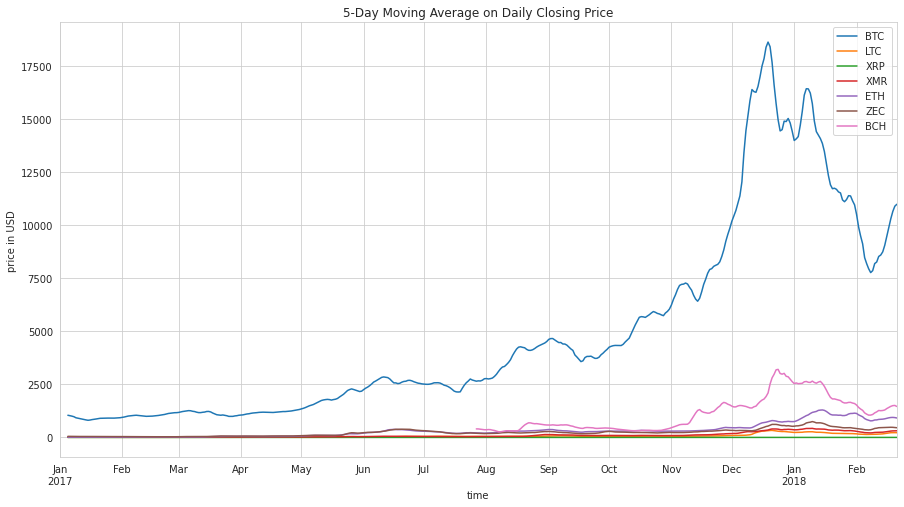

In [83]:
# tracer la moyenne mobile du prix de clôture pour les cryptocurrencies
close_ma.plot(figsize=(15,8))
plt.title('5-Day Moving Average on Daily Closing Price')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.show()

Sur la base du tracé de la moyenne mobile à 5 jours :

1. Les prix du BitCoin et du BitCoin Cash fluctuent un peu plus que le reste des crypto-monnaies.
2. Si l'on regarde à partir de janvier 2018, il semble que le prive de BitCoin avait considérablement chuté, mais a commencé à remonter vers février. Cependant, il est difficile de dire si le BitCoin est en train de revenir à son pic de 2017.

### Market Prices of Cryptocurrencies<a id="3-4"></a>

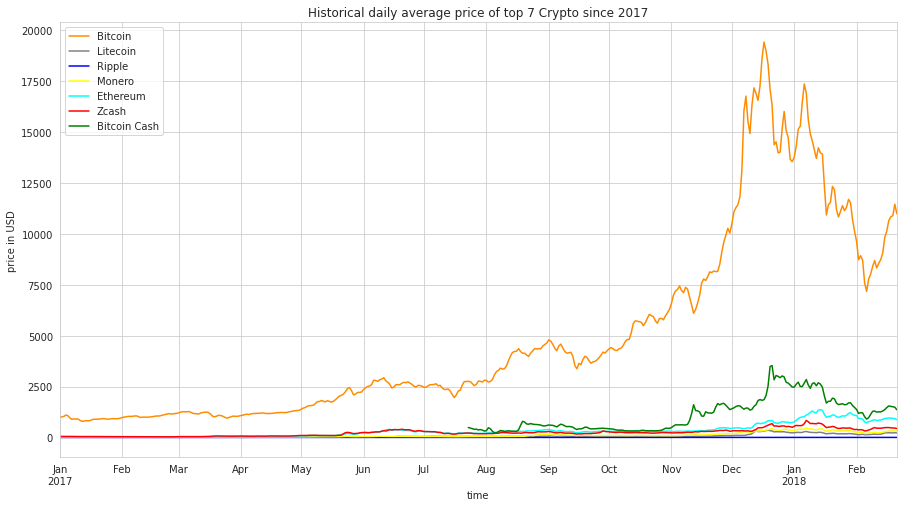

In [84]:
# calculer le prix moyen quotidien
data['daily_avg'] = (data['open'] + data['high'] + data['low'] + data['close']) / 4
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
monero = data[data['symbol']=='XMR']
ethereum = data[data['symbol']=='ETH']
zcash = data[data['symbol']=='ZEC']
bitcoin_cash = data[data['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['daily_avg']).plot(color='darkorange', label='Bitcoin')
(litecoin['daily_avg']).plot(color='grey', label='Litecoin')
(ripple['daily_avg']).plot(color='blue', label='Ripple')
(monero['daily_avg']).plot(color='yellow', label='Monero')
(ethereum['daily_avg']).plot(color='cyan', label='Ethereum')
(zcash['daily_avg']).plot(color='red', label='Zcash')
(bitcoin_cash['daily_avg']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical daily average price of top 7 Crypto since 2017')
plt.legend()
plt.show()

#### Tracez les prix quotidiens individuels d'ouverture, de haut, de bas et de clôture.

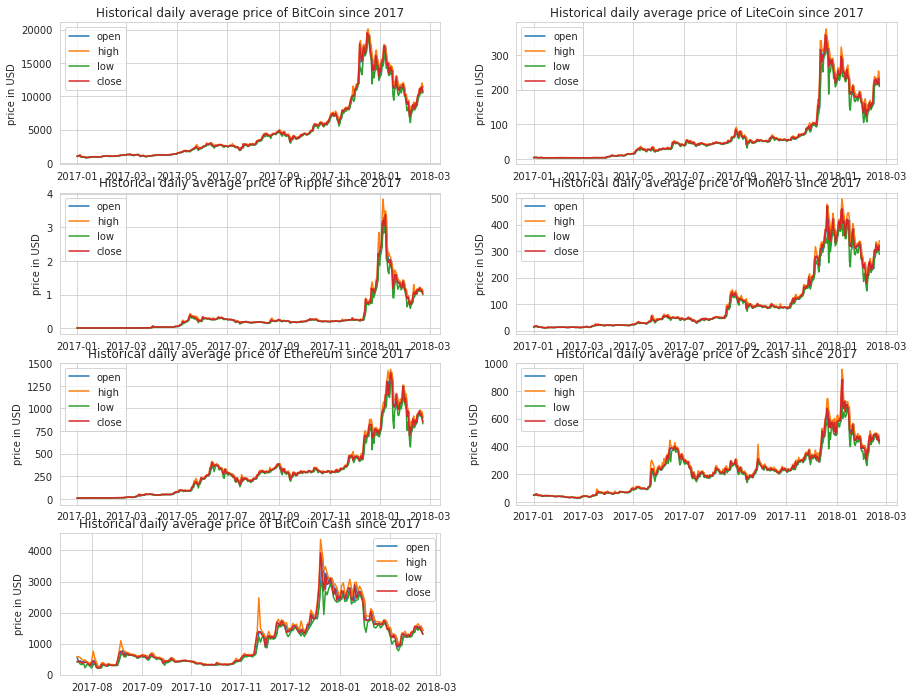

In [85]:
plt.figure(figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(bitcoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,2)
plt.plot(litecoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of LiteCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,3)
plt.plot(ripple[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ripple since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,4)
plt.plot(monero[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Monero since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,5)
plt.plot(ethereum[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,6)
plt.plot(zcash[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Zcash since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,7)
plt.plot(bitcoin_cash[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin Cash since 2017')
plt.legend(['open','high','low','close'])

plt.show()

Beaucoup des graphiques ci-dessus ne montrent pas beaucoup de différences entre les différents prix, mais comme nous l'avons découvert précédemment à partir du volume des transactions et de la variation moyenne des prix, un modèle très évident est que lorsque le prix ou le volume du bitcoin augmente, le prix et le volume des autres crypto-monnaies augmentent également. C'est probablement parce que le succès du Bitcoin ouvre la voie aux écosystèmes de crypto-monnaies et attire de plus en plus d'investisseurs. En outre, le prix d'achat élevé du bitcoin pourrait déclencher des achats pour ses alternatives moins chères.

#### Vérifier le coefficient de corrélation de Pearson pour prouver que le prix du BitCoin influence le prix des autres cryptocurrencies

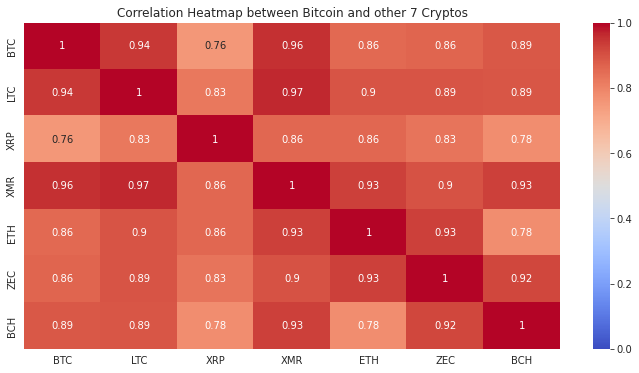

In [86]:
plt.figure(figsize=(12,6))
sns.heatmap(close.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other 7 Cryptos')
plt.show()

Sur la base de la carte de chaleur ainsi que de certains des graphiques précédents, nous pouvons dire que le prix du Bitcoin a un fort impact sur les autres crypto-monnaies.

1. Le volume des transactions en BitCoin a augmenté, tout comme le volume des autres crypto-monnaies.
2. Le prix du BitCoin a augmenté, tout comme le prix des autres crypto-monnaies.
3. Il semble que BitCoin soit à la tête des changements du marché.
4. Les prix des autres crypto-monnaies ont une forte corrélation positive avec le prix du BitCoin.

### Return Ratio<a id="3-5"></a>

return ratio = valeur actuelle de la crypto-monnaie / valeur initiale de la crypto-monnaie

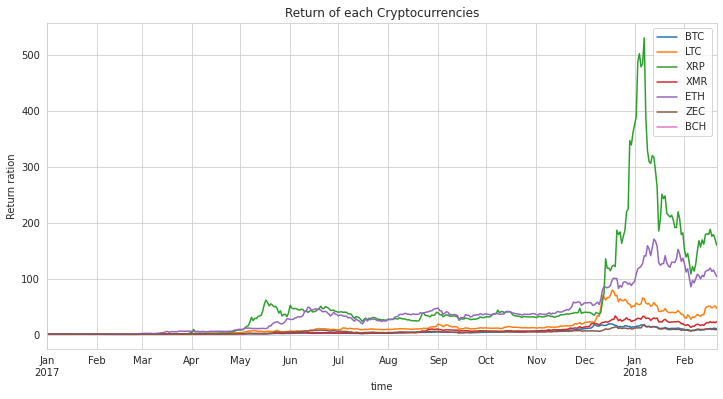

In [87]:
returns = close.apply(lambda x: x/x[0])
returns.plot(figsize=(12,6))
plt.ylabel('Return ration')
plt.xlabel('time')
plt.title('Return of each Cryptocurrencies')
plt.show()

Il semble que depuis 2017, Ripple (XRP) et Ethereum (ETH) ont le ratio de rendement le plus élevé, tandis que le reste des crypto-monnaies reste assez stable.

1. Investir dans le Ripple et l'Ethereum pourrait obtenir de meilleurs rendements, mais depuis 2018, la tendance est à la baisse.
2. Investir dans des crypto-monnaies populaires comme BitCoin et LiteCoin pourrait encore valoir la peine d'essayer puisque leur prix est assez stable et qu'il semble y avoir une tendance à la hausse.